# Imports

In [1]:
import pandas as pd
import numpy as np
from timeseries_generator.external_factors import CountryGdpFactor, EUIndustryProductFactor
from timeseries_generator import LinearTrend, Generator, HolidayFactor, RandomFeatureFactor, SinusoidalFactor, WeekdayFactor, WhiteNoise

# Generate Data

<AxesSubplot:xlabel='date'>

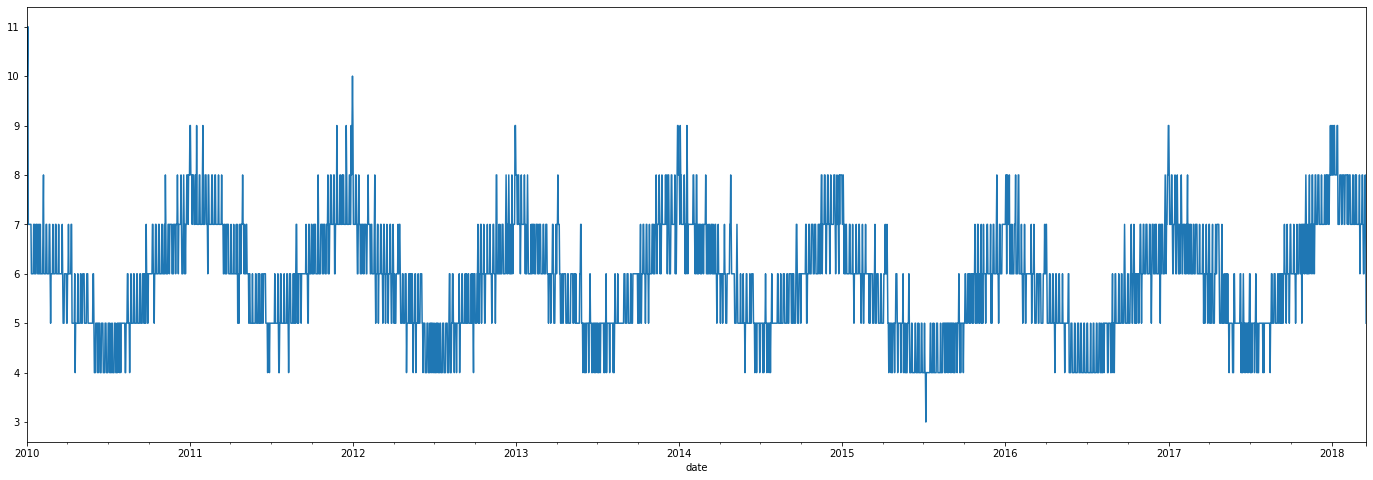

In [6]:
df = Generator(factors = {CountryGdpFactor(),
                          EUIndustryProductFactor(),
                          HolidayFactor(holiday_factor = 1.5),
                          WeekdayFactor(
                              factor_values = {4: 1.05, 5: 1.15, 6: 1.15}  
                          ), # Here we assign a factor of 1.05 to Friday, and 1.15 to Sat/Sun
                          SinusoidalFactor(wavelength = 365, 
                                           amplitude = 0.2, 
                                           phase = 365/4, 
                                           mean = 1),
                          WhiteNoise(stdev_factor = 0.05)},
               features = {"country": ["Netherlands"],
                           "store": ["store1"],
                           "product": ["winter jacket"]},
               date_range = pd.date_range(start = '2010', periods = 3000, freq = 'D'),
               base_value = 5).generate()

df.value = round(df.value)
df.set_index('date').value.plot(figsize = (24,8))